In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re


import pandas as pd
data = pd.read_csv('SMSSpamCollection',sep = '\t',names = ['label','message'])

In [2]:
corpus = []
ps = PorterStemmer()
for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z]',' ',data['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [3]:
y = pd.get_dummies(data['label'],drop_first=True)

In [4]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
tf = TfidfVectorizer(ngram_range= (1,5),max_features= 4000)
x_new = tf.fit_transform(corpus).toarray()

In [7]:
x_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
tf.get_feature_names()

['aathi',
 'abiola',
 'abl',
 'abt',
 'ac',
 'acc',
 'accept',
 'access',
 'account',
 'account statement',
 'account statement show',
 'account statement show un',
 'account statement show un redeem',
 'across',
 'across sea',
 'act',
 'activ',
 'actual',
 'ad',
 'add',
 'address',
 'admir',
 'admir look',
 'admir look make',
 'admir look make contact',
 'admir look make contact find',
 'ador',
 'adult',
 'advanc',
 'advic',
 'affair',
 'affect',
 'aft',
 'afternoon',
 'afternoon love',
 'aftr',
 'age',
 'ago',
 'ah',
 'aha',
 'ahead',
 'ahmad',
 'aight',
 'aint',
 'air',
 'airport',
 'aiyah',
 'aiyo',
 'al',
 'alert',
 'alex',
 'allah',
 'allow',
 'almost',
 'alon',
 'alreadi',
 'alright',
 'alrit',
 'also',
 'alway',
 'amaz',
 'amount',
 'amp',
 'amt',
 'an',
 'angri',
 'announc',
 'anoth',
 'anoth day',
 'answer',
 'anybodi',
 'anymor',
 'anyon',
 'anyth',
 'anyth lor',
 'anytim',
 'anytim network',
 'anytim network min',
 'anytim network min half',
 'anytim network min half price'

In [9]:
len(x_new)

5572

In [10]:
X_final = pd.DataFrame(x_new, columns= tf.get_feature_names())

In [11]:
X_final.isnull().sum().any()

False

In [12]:
X_final.shape

(5572, 4000)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train, y_train)

y_pred_lemm = mb.predict(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred_lemm,y_test))

print("TRAIN DATA accuracy:", mb.score(X_train,y_train))

print("TEST data accuracy: ", mb.score(X_test,y_test))

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[1448   46]
 [   0  178]]
TRAIN DATA accuracy: 0.9725641025641025
TEST data accuracy:  0.972488038277512


<AxesSubplot:ylabel='Count'>

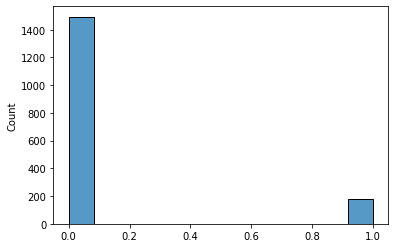

In [14]:
import seaborn as sns
sns.histplot(y_pred_lemm)

In [15]:
y_test.value_counts()

spam
0       1448
1        224
dtype: int64

In [16]:
data_pred = pd.DataFrame(y_pred_lemm ,columns =['predicted'])

In [17]:
data_pred.shape

(1672, 1)

In [21]:
data_new = pd.concat([data_pred,p],axis=1)

In [20]:
p = y_test.reset_index(drop=True)

In [22]:
data_pred

,predicted
0,0
1,0
2,0
3,0
4,0
...,...
1667,0
1668,1
1669,0
1670,1


In [23]:
data_new

,predicted,spam
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1667,0,0
1668,1,1
1669,0,0
1670,1,1


In [24]:
y_test.shape

(1672, 1)

In [25]:
data_pred.shape

(1672, 1)

<AxesSubplot:xlabel='predicted', ylabel='count'>

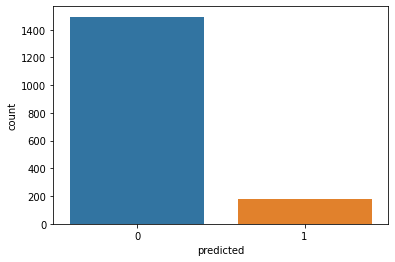

In [26]:
sns.countplot(data = data_new,x='predicted')

In [27]:
data_new['predicted'].value_counts()

0    1494
1     178
Name: predicted, dtype: int64

In [28]:
data_new['spam'].value_counts()

0    1448
1     224
Name: spam, dtype: int64

<AxesSubplot:xlabel='spam', ylabel='count'>

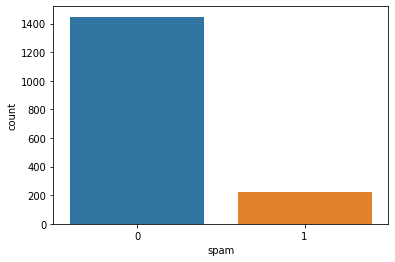

In [29]:
sns.countplot(data = data_new,x='spam')

(array([1448.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         224.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

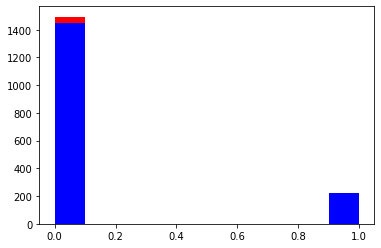

In [30]:
import matplotlib.pyplot as plt
plt.hist(data_new['predicted'],color='red')
plt.hist(data_new['spam'],color='blue')

In [38]:

import numpy as np
alpha = np.arange(0.1,1.1,0.1)
print(alpha)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [40]:
from sklearn.metrics import accuracy_score
for i in range(len(alpha)):
    alpha = np.arange(0.1,1.1,0.1)
    mb = MultinomialNB(alpha = alpha[i])
    mb.fit(X_train,y_train)
    y_pred = mb.predict(X_test)
    print("value of alpha is {} ,accuracy: {}".format(alpha[i],accuracy_score(y_test,y_pred)))

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


value of alpha is 0.1 ,accuracy: 0.9826555023923444


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


value of alpha is 0.2 ,accuracy: 0.9838516746411483


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


value of alpha is 0.30000000000000004 ,accuracy: 0.9832535885167464


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


value of alpha is 0.4 ,accuracy: 0.9808612440191388


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


value of alpha is 0.5 ,accuracy: 0.9796650717703349


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


value of alpha is 0.6 ,accuracy: 0.9784688995215312


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


value of alpha is 0.7000000000000001 ,accuracy: 0.9766746411483254


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


value of alpha is 0.8 ,accuracy: 0.9748803827751196


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


value of alpha is 0.9 ,accuracy: 0.9748803827751196


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


value of alpha is 1.0 ,accuracy: 0.972488038277512


In [41]:
mb = MultinomialNB(alpha=0.3)
mb.fit(X_train, y_train)

y_pred_lemm = mb.predict(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred_lemm,y_test))

print("TRAIN DATA accuracy:", mb.score(X_train,y_train))

print("TEST data accuracy: ", mb.score(X_test,y_test))

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[1447   27]
 [   1  197]]
TRAIN DATA accuracy: 0.9841025641025641
TEST data accuracy:  0.9832535885167464


In [43]:
mb = MultinomialNB(alpha=0.2)
mb.fit(X_train, y_train)

y_pred_lemm = mb.predict(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred_lemm,y_test))

print("TRAIN DATA accuracy:", mb.score(X_train,y_train))

print("TEST data accuracy: ", mb.score(X_test,y_test))

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[1447   26]
 [   1  198]]
TRAIN DATA accuracy: 0.9846153846153847
TEST data accuracy:  0.9838516746411483


In [44]:
mb.coef_[0]

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-9.67715821, -9.67715821, -9.67715821, ..., -9.67715821,
       -9.67715821, -7.77205267])

In [45]:
feature_names = tf.get_feature_names()
### Most real words since coef value is lesss means close to zeroo
sorted(zip(mb.coef_[0], feature_names), reverse=True)[:20]

[(-4.656637337726568, 'call'),
 (-4.897247510173306, 'free'),
 (-5.1819800757261785, 'text'),
 (-5.203705293128198, 'txt'),
 (-5.397437687558323, 'mobil'),
 (-5.406091270352526, 'stop'),
 (-5.44531301538489, 'repli'),
 (-5.598198367870278, 'claim'),
 (-5.665496415004785, 'new'),
 (-5.685125353936786, 'www'),
 (-5.709189387628801, 'ur'),
 (-5.722992571355349, 'tone'),
 (-5.792226089576092, 'min'),
 (-5.797098868695984, 'servic'),
 (-5.831883485518163, 'uk'),
 (-5.854431067901927, 'com'),
 (-5.858442568387861, 'win'),
 (-5.9336019507091375, 'award'),
 (-5.940982048840434, 'prize'),
 (-5.9590500235566815, 'cash')]

In [48]:
### SPAM words -- away from zero


sorted(zip(mb.coef_[0], feature_names), reverse=False)[:150]

[(-9.677158208428882, 'aathi'),
 (-9.677158208428882, 'abiola'),
 (-9.677158208428882, 'abl'),
 (-9.677158208428882, 'abt'),
 (-9.677158208428882, 'acc'),
 (-9.677158208428882, 'accept'),
 (-9.677158208428882, 'across'),
 (-9.677158208428882, 'across sea'),
 (-9.677158208428882, 'act'),
 (-9.677158208428882, 'actual'),
 (-9.677158208428882, 'add'),
 (-9.677158208428882, 'ador'),
 (-9.677158208428882, 'advanc'),
 (-9.677158208428882, 'advic'),
 (-9.677158208428882, 'affair'),
 (-9.677158208428882, 'affect'),
 (-9.677158208428882, 'aft'),
 (-9.677158208428882, 'afternoon'),
 (-9.677158208428882, 'afternoon love'),
 (-9.677158208428882, 'aftr'),
 (-9.677158208428882, 'ago'),
 (-9.677158208428882, 'ah'),
 (-9.677158208428882, 'aha'),
 (-9.677158208428882, 'ahead'),
 (-9.677158208428882, 'ahmad'),
 (-9.677158208428882, 'aight'),
 (-9.677158208428882, 'aint'),
 (-9.677158208428882, 'air'),
 (-9.677158208428882, 'aiyah'),
 (-9.677158208428882, 'aiyo'),
 (-9.677158208428882, 'al'),
 (-9.677158

In [53]:
from sklearn.linear_model import PassiveAggressiveClassifier
ps_clf  = PassiveAggressiveClassifier(C=0.5)


ps_clf.fit(X_train, y_train)

y_pred_lemm1 = ps_clf.predict(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred_lemm1,y_test))

print("TRAIN DATA accuracy:", mb.score(X_train,y_train))

print("TEST data accuracy: ", mb.score(X_test,y_test))

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[1444   23]
 [   4  201]]
TRAIN DATA accuracy: 0.9846153846153847
TEST data accuracy:  0.9838516746411483


In [52]:
sorted(zip(ps_clf.coef_[0], feature_names), reverse=True)[:20]

[(4.50112696913491, 'claim'),
 (4.463941535897157, 'mobil'),
 (3.9878941544787523, 'txt'),
 (3.96455717585332, 'uk'),
 (3.833915521492823, 'com'),
 (3.7800740357693314, 'alert'),
 (3.7181069207116795, 'rington'),
 (3.708861022189361, 'servic'),
 (3.5098182744613613, 'www'),
 (3.231753215264666, 'video'),
 (3.0656643446002465, 'tone'),
 (3.0167370828711286, 'min'),
 (2.9343224744985537, 'pobox'),
 (2.83620746341896, 'prize'),
 (2.835881702981014, 'next'),
 (2.832685500872678, 'rate'),
 (2.7464405660336952, 'info'),
 (2.710247889207896, 'sex'),
 (2.6332770562725587, 'order'),
 (2.614661599196077, 'pound')]

In [54]:
tf.stop_words_

{'think miss',
 'kalli wont play',
 'love own possess',
 'gonna abl late notic',
 'gender wither gay',
 'year miss',
 'nite til',
 'say stupid miss nice',
 'phone still jenni',
 'toss',
 'go month den got effect',
 'guy tri bother',
 'uk wrc',
 'floor window',
 'night worri appt shame miss',
 'yest lor except',
 'dessert wan go suntec',
 'slave smile drink',
 'wine pie',
 'slave send teas kiss across',
 'made payment dont much',
 'brother pl send number skype',
 'plz dont ask creat much',
 'lazi peopl',
 'lol yep',
 'pl send messag download movi',
 'bring see like lt',
 'dollar got',
 'fr lunch wif si',
 'pout stomp feet pout stomp',
 'walkabout far meet',
 'xclusiv clubsaisai morow soire',
 'much despar',
 'sachin stand other hit',
 'ur fault basic',
 'call rstm sw ss ppm',
 'today accept day',
 'appear',
 'bambl',
 'sun go cine',
 'sae cs jame',
 'ur hand plz dont',
 'believ time week',
 'husband let see',
 'check happen around',
 'leav xy feel awkward',
 'companion lover chef',
 'co

In [56]:
tf.vocabulary_

{'go': 1241,
 'point': 2577,
 'crazi': 747,
 'avail': 139,
 'bugi': 331,
 'great': 1305,
 'world': 3918,
 'la': 1626,
 'cine': 587,
 'got': 1296,
 'wat': 3753,
 'ok': 2394,
 'lar': 1644,
 'joke': 1592,
 'wif': 3859,
 'oni': 2421,
 'ok lar': 2397,
 'free': 1122,
 'entri': 959,
 'wkli': 3906,
 'comp': 671,
 'win': 3867,
 'fa': 1016,
 'cup': 765,
 'final': 1071,
 'st': 3110,
 'may': 1959,
 'text': 3288,
 'receiv': 2729,
 'question': 2658,
 'std': 3139,
 'txt': 3437,
 'rate': 2684,
 'appli': 85,
 'free entri': 1136,
 'entri wkli': 965,
 'std txt': 3140,
 'txt rate': 3453,
 'rate appli': 2686,
 'free entri wkli': 1139,
 'std txt rate': 3141,
 'txt rate appli': 3454,
 'std txt rate appli': 3142,
 'dun': 898,
 'say': 2875,
 'earli': 904,
 'alreadi': 55,
 'nah': 2207,
 'think': 3316,
 'goe': 1272,
 'usf': 3642,
 'live': 1742,
 'around': 97,
 'though': 3326,
 'freemsg': 1156,
 'hey': 1430,
 'darl': 787,
 'week': 3792,
 'word': 3912,
 'back': 175,
 'like': 1718,
 'fun': 1175,
 'still': 3144,
 't

In [66]:
X_final['word'].value_counts() ################# word columns value count

0.000000    5513
0.128008       3
0.275327       3
0.279835       2
0.203614       2
0.166261       2
0.120043       2
0.245895       2
0.206601       2
0.632441       1
0.117154       1
0.217234       1
0.289180       1
0.305858       1
0.268008       1
0.277294       1
0.249051       1
0.346411       1
0.472564       1
0.214730       1
0.227561       1
0.242572       1
0.216816       1
0.181252       1
0.395046       1
0.631834       1
0.309868       1
0.208625       1
0.242815       1
0.313888       1
0.117772       1
0.472404       1
0.128586       1
0.327088       1
0.202436       1
0.328187       1
0.203457       1
0.486823       1
0.214142       1
0.490458       1
0.237194       1
0.216705       1
0.322650       1
0.253118       1
0.343676       1
0.259670       1
0.308687       1
0.232256       1
0.180601       1
0.298376       1
Name: word, dtype: int64

In [77]:
X_final.iloc[:,3912].value_counts() ################### 3912 is the column index /position

0.000000    5513
0.128008       3
0.275327       3
0.279835       2
0.203614       2
0.166261       2
0.120043       2
0.245895       2
0.206601       2
0.632441       1
0.117154       1
0.217234       1
0.289180       1
0.305858       1
0.268008       1
0.277294       1
0.249051       1
0.346411       1
0.472564       1
0.214730       1
0.227561       1
0.242572       1
0.216816       1
0.181252       1
0.395046       1
0.631834       1
0.309868       1
0.208625       1
0.242815       1
0.313888       1
0.117772       1
0.472404       1
0.128586       1
0.327088       1
0.202436       1
0.328187       1
0.203457       1
0.486823       1
0.214142       1
0.490458       1
0.237194       1
0.216705       1
0.322650       1
0.253118       1
0.343676       1
0.259670       1
0.308687       1
0.232256       1
0.180601       1
0.298376       1
Name: word, dtype: int64

In [74]:
X_final.head()

,aathi,abiola,abl,abt,ac,acc,accept,access,account,account statement,...,yet,yiju,ym,yo,yoga,yogasana,yr,yun,yup,zed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
X_final.iloc[:,1].value_counts()

0.000000    5561
0.282225       1
0.506447       1
0.266481       1
0.264925       1
0.405023       1
0.386865       1
0.413040       1
0.421080       1
0.357526       1
0.179667       1
0.380690       1
Name: abiola, dtype: int64

In [76]:
X_final['abiola'].value_counts()

0.000000    5561
0.282225       1
0.506447       1
0.266481       1
0.264925       1
0.405023       1
0.386865       1
0.413040       1
0.421080       1
0.357526       1
0.179667       1
0.380690       1
Name: abiola, dtype: int64